In [188]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None #this is to suppress warnings in active IDE code execution

In [189]:
tickers = pd.read_html("https://www.dividendmax.com/market-index-constituents/dow-jones-30")[0]
#taking up the names of the companies included in the dow jones index

In [190]:
tickers

,Company,Ticker,Unnamed: 2,Exchange,Sector,Market Cap
0,3M Co.,MMM,🇺🇸,New York Stock Exchange,General Industrials,$136.0bn
1,American Express Co.,AXP,🇺🇸,New York Stock Exchange,Financial Services,$183.8bn
2,Apple Inc,AAPL,🇺🇸,NASDAQ,Technology Hardware & Equipment,$801.7bn
3,Boeing Co.,BA,🇺🇸,New York Stock Exchange,Aerospace & Defence,$164.6bn
4,Caterpillar Inc.,CAT,🇺🇸,New York Stock Exchange,General Industrials,$137.1bn
5,Chevron Corp.,CVX,🇺🇸,New York Stock Exchange,Oil & Gas Producers,$189.7bn
6,"Cisco Systems, Inc.",CSCO,🇺🇸,NASDAQ,Technology Hardware & Equipment,$292.4bn
7,Coca-Cola Co,KO,🇺🇸,New York Stock Exchange,Beverages,$127.2bn
8,Dow Inc,DOW,🇺🇸,New York Stock Exchange,Chemicals,$46.3bn
9,Exxon Mobil Corp.,XOM,🇺🇸,New York Stock Exchange,Oil & Gas Producers,$251.1bn


In [191]:
tickers = tickers.Ticker.to_list() #taking up just the tickers 

In [192]:
tickers


['MMM',
 'AXP',
 'AAPL',
 'BA',
 'CAT',
 'CVX',
 'CSCO',
 'KO',
 'DOW',
 'XOM',
 'GS',
 'HD',
 'INTC',
 'IBM',
 'JNJ',
 'JPM',
 'MCD',
 'MRK',
 'MSFT',
 'NKE',
 'PFE',
 'PG',
 'RTX',
 'TSLA',
 'TRV',
 'UNH',
 'VZ',
 'V',
 'WBA',
 'WMT']

In [193]:
tickers = [i.replace('.','-') for i in tickers] #to avoid errors while placing online request

In [194]:
tickers

['MMM',
 'AXP',
 'AAPL',
 'BA',
 'CAT',
 'CVX',
 'CSCO',
 'KO',
 'DOW',
 'XOM',
 'GS',
 'HD',
 'INTC',
 'IBM',
 'JNJ',
 'JPM',
 'MCD',
 'MRK',
 'MSFT',
 'NKE',
 'PFE',
 'PG',
 'RTX',
 'TSLA',
 'TRV',
 'UNH',
 'VZ',
 'V',
 'WBA',
 'WMT']

In [195]:
def RSIcal(asset): 
    df = yf.download (asset,start = '2016-01-01')
    df['MAof200'] = df ['Adj Close'].rolling(window=200).mean()
    df['price change'] = df['Adj Close'].pct_change()
    df['Upmove'] = df ['price change'].apply (lambda x:x if x>0 else 0)
    df['Downmove'] =df['price change'].apply(lambda x: abs(x) if x<0 else 0)
    df['avg up'] = df['Upmove'].ewm(span = 19).mean()
    df['avg down'] = df['Downmove'].ewm(span=19).mean()
    df = df.dropna()
    df['RS'] = df ['avg up']/df['avg down']
    df ['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
    df.loc[(df['Adj Close'] > df['MAof200']) & (df['RSI']<30), 'Buy'] = 'Yes'
    df.loc[(df['Adj Close'] < df['MAof200']) | (df['RSI']>30), 'Buy'] = 'No'
    return df
#this function calculates the various parameters we need to calculate to use
#RSI indicator
#WE first calculate the moving average of the last 200 days and the movement of the 
#price. Then we apply the condition on the RSI and then store the yes or no decision in a seperate column 

In [196]:

RSIcal(tickers[0]) 
#running the function on one stock 


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,MAof200,price change,Upmove,Downmove,avg up,avg down,RS,RSI,Buy
Date,,,,,,,,,,,,,,,
2016-10-14,170.990005,171.389999,170.300003,170.330002,147.926529,1512400,144.027098,0.001823,0.001823,0.000000,0.001698,0.003489,0.486737,32.738589,No
2016-10-17,170.539993,171.089996,169.940002,170.210007,147.822311,1229200,144.125061,-0.000705,0.000000,0.000705,0.001528,0.003211,0.476056,32.251897,No
2016-10-18,171.679993,171.910004,169.839996,169.949997,147.596512,1185600,144.238153,-0.001528,0.000000,0.001528,0.001376,0.003042,0.452154,31.136794,No
2016-10-19,170.800003,170.940002,169.660004,169.910004,147.561768,1164200,144.348348,-0.000235,0.000000,0.000235,0.001238,0.002762,0.448300,30.953541,No
2016-10-20,169.570007,170.339996,168.990005,169.860001,147.518311,1210500,144.470966,-0.000295,0.000000,0.000295,0.001114,0.002515,0.443051,30.702361,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-16,201.089996,202.770004,200.380005,202.320007,202.320007,1607000,185.587918,0.008675,0.008675,0.000000,0.004130,0.002672,1.545417,60.713713,No
2021-08-17,202.000000,202.000000,197.600006,199.550003,199.550003,2287900,185.812177,-0.013691,0.000000,0.013691,0.003717,0.003774,0.984811,49.617378,No
2021-08-18,198.570007,198.809998,196.309998,196.509995,196.509995,2116100,186.014012,-0.015234,0.000000,0.015234,0.003345,0.004920,0.679889,40.472263,No


In [197]:
def getSignals(df):
    Buying_dates = []
    Selling_dates = []
    
    for i in range(len(df)-11):
        if "Yes" in df["Buy"].iloc[i]:
            Buying_dates.append(df.iloc[i+1].name)
            for j in range(1,11):
                if df["RSI"].iloc[i+j] > 40:
                    Selling_dates.append(df.iloc[i+j+1].name)
                    break 
                elif j==10:
                    Selling_dates.append(df.iloc[i+j+1].name)
    return Buying_dates,Selling_dates


In [198]:
frame = RSIcal(tickers[0])
buy, sell = getSignals(frame)

[*********************100%***********************]  1 of 1 completed


In [199]:
buy #timestamps for the buys

[Timestamp('2016-10-24 00:00:00'),
 Timestamp('2017-07-26 00:00:00'),
 Timestamp('2017-07-27 00:00:00'),
 Timestamp('2017-07-28 00:00:00'),
 Timestamp('2017-07-31 00:00:00'),
 Timestamp('2018-02-06 00:00:00'),
 Timestamp('2018-02-09 00:00:00'),
 Timestamp('2018-02-12 00:00:00'),
 Timestamp('2021-01-12 00:00:00'),
 Timestamp('2021-06-17 00:00:00'),
 Timestamp('2021-06-18 00:00:00'),
 Timestamp('2021-06-21 00:00:00')]

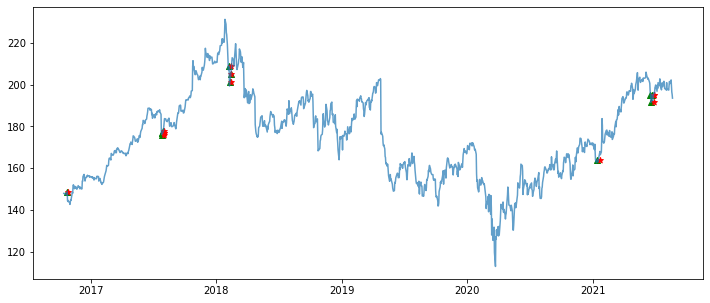

In [200]:
plt.figure(figsize=(12,5))
plt.scatter(frame.loc[buy].index,frame.loc[buy]['Adj Close'], marker = '^', c= 'g')
plt.scatter(frame.loc[sell].index,frame.loc[buy]['Adj Close'], marker = '*', c= 'r')
plt.plot(frame['Adj Close'], alpha = 0.7)
#plotting the price movement and the buy signals along with the sell signals corresondingly for that one stock

In [201]:
profits = (frame.loc[sell].Open.values - frame.loc[buy].Open.values)/frame.loc[buy].Open.values
#here we are calculating the returns from a particular buy and sell instance

In [202]:
profits
#listing the profits involved in the buying and selling of one particular stock in the whole period under consideration


array([-0.01841872,  0.01366927,  0.02033747,  0.01195283,  0.01595001,
        0.00852711,  0.02154845,  0.00861573,  0.01892706, -0.0052846 ,
        0.01409035,  0.01120925])

In [203]:
wins = [i for i in profits if i>0]
#calculating the number of times the RSI indicator programmed above successfully generates profits in a buy/sell instance

In [204]:
wins


[0.013669271812818008,
 0.020337466426487982,
 0.011952832489283168,
 0.01595001220703125,
 0.008527108646859727,
 0.02154844541533546,
 0.00861572556046653,
 0.01892706151398465,
 0.014090350783795424,
 0.011209247430109006]

In [205]:
len(wins)/len(profits) 
#calculating the win percentage for a particular stock 

0.8333333333333334

In [206]:
#now performing the same analysis for all the stocks in the DJI
matrixsignals = []
matrixprofits = []
for i in range(len(tickers)):
    frame = RSIcal(tickers[i])
    buy,sell = getSignals(frame)
    profits = (frame.loc[sell].Open.values - frame.loc[buy].Open.values)/frame.loc[buy].Open.values
    matrixsignals.append(buy)
    matrixprofits.append(profits)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [207]:
len(matrixprofits)

30

In [208]:
matrixprofits


[array([-0.01841872,  0.01366927,  0.02033747,  0.01195283,  0.01595001,
         0.00852711,  0.02154845,  0.00861573,  0.01892706, -0.0052846 ,
         0.01409035,  0.01120925]),
 array([0.05340888, 0.04768801, 0.03473374, 0.01075374, 0.00019178,
        0.02304643]),
 array([-0.01364456, -0.00991175,  0.01243894, -0.0018169 ,  0.02511197,
         0.03040253, -0.0019707 ,  0.02149114,  0.02234436,  0.0155075 ,
         0.02600169,  0.0139017 , -0.02162751, -0.02948402, -0.03122571,
         0.0179132 ,  0.03337886,  0.01803371,  0.05981927,  0.18040116,
         0.07577588,  0.03757273,  0.02777334,  0.02991661,  0.04747539,
         0.0376566 ,  0.02234734,  0.0179804 ]),
 array([-0.00860674,  0.03125841,  0.02368222,  0.03872727,  0.02046836,
        -0.01728187,  0.00429349,  0.01520703,  0.01449581,  0.00485716,
         0.02096038,  0.03156161,  0.02676563,  0.01994444,  0.01452917,
        -0.00712651]),
 array([ 0.02609012,  0.02987461,  0.02147628,  0.01708018,  0.00861183,

In [209]:
allprofits = []
consolidated = []
for i in matrixprofits:
    k=1
    for e in i:
        allprofits.append(e)
        k= k*(1+e)
    consolidated.append(k)

In [210]:
wins = [i for i in allprofits if i>0]
len(wins)/len(allprofits)

0.70276008492569

The above 

In [211]:
consolidated 


[1.1272776400372084,
 1.181086042375394,
 1.8904507401389157,
 1.2588931832738202,
 1.5138486594653036,
 1.2664103761743326,
 1.490898138185769,
 1.1520228522724227,
 1.1807405062556107,
 1.0990854877054368,
 0.6184978959100349,
 0.9175412667475842,
 0.45740021164678,
 0.8351250762539332,
 1.1569390331944418,
 0.5609678683559146,
 1.0166983898191515,
 1.2387589439434292,
 1.248168524435596,
 1.2067523829974174,
 0.9571569527285259,
 1.0916253494940507,
 1.1800882236033507,
 4.629439660540846,
 1.1041259204603135,
 1.5241652116524527,
 1.2387974687379084,
 1.2134702063339342,
 0.46231178656770167,
 1.1289661933617854]

In [212]:
allprofits

[-0.018418724518970305,
 0.013669271812818008,
 0.020337466426487982,
 0.011952832489283168,
 0.01595001220703125,
 0.008527108646859727,
 0.02154844541533546,
 0.00861572556046653,
 0.01892706151398465,
 -0.005284596182899224,
 0.014090350783795424,
 0.011209247430109006,
 0.05340887939560467,
 0.047688008682973536,
 0.034733737631987095,
 0.01075373568324398,
 0.00019177713478231613,
 0.023046431288559766,
 -0.01364456240252233,
 -0.0099117504977702,
 0.012438943050818671,
 -0.0018169020195300852,
 0.025111974822998692,
 0.030402532354768207,
 -0.0019707022132709156,
 0.021491141773020788,
 0.022344364285469993,
 0.015507497740734495,
 0.026001691803805693,
 0.013901703961796125,
 -0.021627510768171675,
 -0.02948401937382544,
 -0.031225706035048754,
 0.017913203867963814,
 0.03337886063597562,
 0.01803370508719957,
 0.059819267516347564,
 0.18040115797395365,
 0.0757758776425441,
 0.03757273307704338,
 0.027773340426581705,
 0.02991661331251017,
 0.047475385415440115,
 0.037656595249

In [213]:
overall = [i * 1000 for i in consolidated]
overall     

[1127.2776400372084,
 1181.0860423753938,
 1890.4507401389158,
 1258.8931832738201,
 1513.8486594653036,
 1266.4103761743327,
 1490.898138185769,
 1152.0228522724228,
 1180.7405062556106,
 1099.085487705437,
 618.4978959100349,
 917.5412667475841,
 457.40021164678,
 835.1250762539332,
 1156.939033194442,
 560.9678683559146,
 1016.6983898191515,
 1238.7589439434291,
 1248.168524435596,
 1206.7523829974173,
 957.1569527285259,
 1091.6253494940506,
 1180.0882236033508,
 4629.439660540846,
 1104.1259204603136,
 1524.1652116524526,
 1238.7974687379085,
 1213.4702063339341,
 462.3117865677017,
 1128.9661933617854]

In [217]:
total = sum(overall)
total 

36947.71019266936

In [219]:
return_annual = (43736 / 30000)**0.2
(return_annual-1)*100

7.830982236593642